In [23]:
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt

In [24]:
# 替換成你的文本檔案路徑
file_path = 'The_Value_of_the_Tutorial_System.txt'

with open(file_path, 'r', encoding='utf-8') as file:
    text = file.read()

In [25]:
# 将文本转为小写，并过滤停用词（可以根据需要自定义停用词列表）
stop_words = set(['the', 'and', 'in', 'of', 'to', 'a', 'is', 'for', 'on', 'with', 'as', 'year', 'their', 'first', 'they', 'are', 'that', 'an', 'about'])
tokens = [token.lower() for token in tokens if token.isalpha() and token.lower() not in stop_words]

In [26]:
# 使用CountVectorizer进行词频分析
vectorizer = CountVectorizer()
X = vectorizer.fit_transform([' '.join(tokens)])

In [27]:
# 获取词汇列表
feature_names = vectorizer.get_feature_names_out()

In [28]:
# 构建词频字典
word_freq = dict(zip(feature_names, X.toarray()[0]))

In [29]:
# 获取前十名词汇和频次
top_words = sorted(word_freq.items(), key=lambda x: x[1], reverse=True)[:10]

In [30]:
# 打印前十名常见词
print(top_words)

[('students', 60), ('academic', 27), ('residential', 23), ('advising', 20), ('advisors', 19), ('proctors', 18), ('tutors', 17), ('learning', 13), ('house', 12), ('student', 12)]


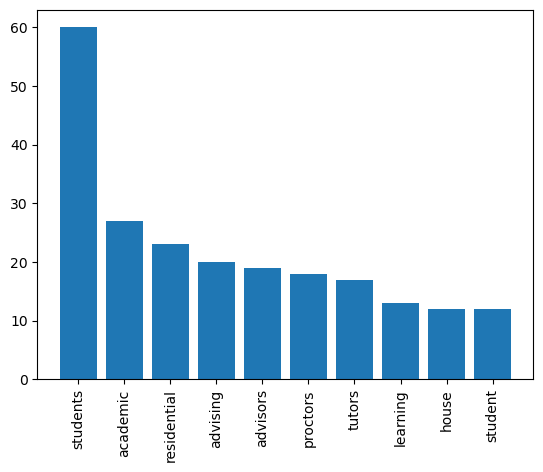

In [31]:
# 绘制前十名词频分布图
plt.bar([word[0] for word in top_words], [word[1] for word in top_words])
plt.xticks(rotation='vertical')
plt.show()

In [21]:
!pip install matplotlib

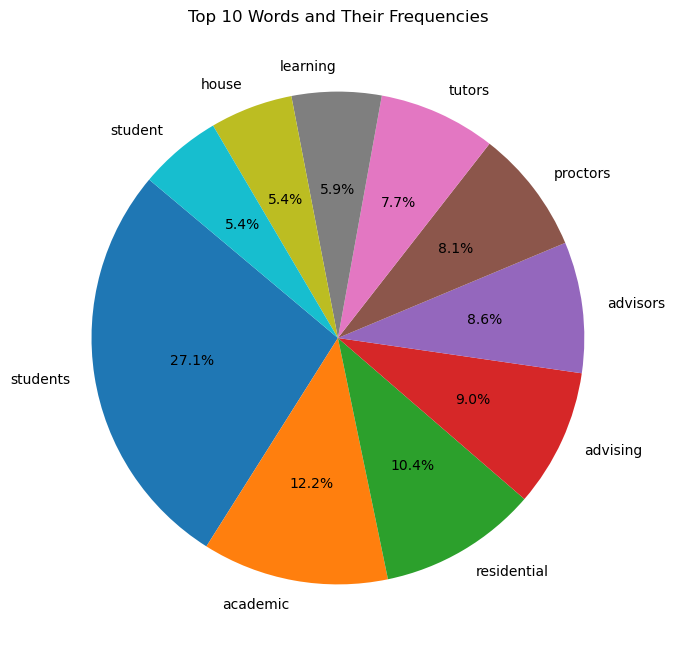

In [32]:
# Importing necessary libraries
import matplotlib.pyplot as plt

# Extracting top words and frequencies
top_words, top_freq = zip(*top_words)

# Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(top_freq, labels=top_words, autopct='%1.1f%%', startangle=140)
plt.title('Top 10 Words and Their Frequencies')
plt.show()

In [15]:
from gensim import corpora, models

In [16]:
# 创建文档-词矩阵
dictionary = corpora.Dictionary([tokens])
corpus = [dictionary.doc2bow(tokens)]

In [17]:
# 建立LDA模型
lda_model = models.LdaModel(corpus, num_topics=3, id2word=dictionary, passes=15)

In [18]:
# 打印主题分布
topics = lda_model.print_topics(num_words=5)
for topic in topics:
    print(topic)

(0, '0.001*"students" + 0.001*"academic" + 0.001*"advisors" + 0.001*"advising" + 0.001*"proctors"')
(1, '0.027*"students" + 0.012*"academic" + 0.011*"residential" + 0.009*"advising" + 0.009*"advisors"')
(2, '0.001*"students" + 0.001*"academic" + 0.001*"residential" + 0.001*"advisors" + 0.001*"advising"')
